In [2]:
employees = [['John Smith', '034523452', 1500],
            ['Mary Simos', '0ET242234', 2550],
            ['', '0ET24223F', 100],
            ['Adam Blackkkkkkkkkkkkkkkkkkkkkkkkkk', '033242234', 1200],
            ['Henry Dawnson', '044242234', 950],
            ['', '0ET242234', 550]]

In [3]:
def clean_employee(employees, fix_name, fix_phone, fix_salary):
    for e in employees:
        fix_name(e)
        fix_phone(e)
        fix_salary(e)

In [4]:
def fix_empty_name(e):
    if e[0] == '':
        e[0] = 'John Doe'

def fix_nothing(e):
    pass

clean_employee(employees, fix_empty_name, fix_nothing, fix_nothing)
print(employees)

[['John Smith', '034523452', 1500], ['Mary Simos', '0ET242234', 2550], ['John Doe', '0ET24223F', 100], ['Adam Blackkkkkkkkkkkkkkkkkkkkkkkkkk', '033242234', 1200], ['Henry Dawnson', '044242234', 950], ['John Doe', '0ET242234', 550]]


In [5]:
def fix_salary(e):
    if e[2] > 2000:
        e[2] = 2000
    elif e[2] < 200:
        e[2] = 200

def fix_long_name(e):
    if len(e[0]) > 20:
        e[0] = e[0][:20]

def fix_phone(e):
    phone = [c if c.isdigit() else '0' for c in e[1]]
    e[1] = ''.join(phone)

clean_employee(employees, fix_long_name, fix_phone, fix_salary)
print(employees)

[['John Smith', '034523452', 1500], ['Mary Simos', '000242234', 2000], ['John Doe', '000242230', 200], ['Adam Blackkkkkkkkkkk', '033242234', 1200], ['Henry Dawnson', '044242234', 950], ['John Doe', '000242234', 550]]


In [6]:
valid_salaries = [e[2] for e in employees if 200 <= e[2] <= 2000]
def fix_salary_to_mean(e):
    mean = sum(valid_salaries)//len(valid_salaries)
    if e[2] > 2000 or e[2] < 200:
        e[2] = mean

def fix_non_digit_to_previous_digit(e):     #check
    fix = 0
    phone = [c for c in e[1]]
    count = 0
    for c in e[1]:  
        # print(c)
        if c.isdigit():
            fix = c
            phone[count] = c
            count += 1
        else:
            c = fix
            phone[count] = fix
            count += 1
    e[1] = ''.join(phone)
    # print(phone)

# clean_employee(employees, fix_nothing, fix_nothing, fix_salary_to_mean)
clean_employee(employees, fix_nothing, fix_non_digit_to_previous_digit, fix_nothing)
print(employees)

[['John Smith', '034523452', 1500], ['Mary Simos', '000242234', 2000], ['John Doe', '000242230', 200], ['Adam Blackkkkkkkkkkk', '033242234', 1200], ['Henry Dawnson', '044242234', 950], ['John Doe', '000242234', 550]]


In [7]:
def fix_phone_last_digit(e):
    phone = ['0'] + [c for c in e[1]]
    for i in range(len(phone)):
        if not phone[i].isdigit():
            phone[i] = phone[i-1]
    e[1] = ''.join(phone[1:])

print(employees)
clean_employee(employees, fix_nothing, fix_phone_last_digit, fix_nothing)
print(employees)

[['John Smith', '034523452', 1500], ['Mary Simos', '000242234', 2000], ['John Doe', '000242230', 200], ['Adam Blackkkkkkkkkkk', '033242234', 1200], ['Henry Dawnson', '044242234', 950], ['John Doe', '000242234', 550]]
[['John Smith', '034523452', 1500], ['Mary Simos', '000242234', 2000], ['John Doe', '000242230', 200], ['Adam Blackkkkkkkkkkk', '033242234', 1200], ['Henry Dawnson', '044242234', 950], ['John Doe', '000242234', 550]]


In [8]:
# Lambda, syntax = lambda x:y   | Muc dich de lam ngan ngon viec viet nhung ham ngan 
def my_sort(items, compare = lambda x,y: x>y):
    for i in range(len(items) - 1):
        for j in range(i + 1, len(items)):
            if compare(items[i], items[j]):
                items[i], items[j] = items[j], items[i]

In [9]:
import numpy as np
numbers = np.random.randint(10, 100, 20)
print(numbers)
my_sort(numbers)
print(numbers)
my_sort(numbers, lambda x, y: x<y)
print(numbers)

# Sort acs by last digit
my_sort(numbers, lambda x, y: x%10 > y%10)
print(numbers)
# Sort desc by last digit 
my_sort(numbers, lambda x, y: x%10 < y%10)
print(numbers)
# Sort asc by sum of digit
my_sort(numbers, lambda x, y: (x%10 + x // 10) > (y%10 + y //10))
print(numbers)

[73 11 80 64 53 59 11 57 97 42 57 45 99 25 29 91 83 65 44 57]
[11 11 25 29 42 44 45 53 57 57 57 59 64 65 73 80 83 91 97 99]
[99 97 91 83 80 73 65 64 59 57 57 57 53 45 44 42 29 25 11 11]
[80 91 11 11 42 83 73 53 44 64 25 65 45 57 97 57 57 59 99 29]
[59 99 29 57 57 97 57 65 45 25 44 64 83 73 53 42 11 11 91 80]
[11 11 42 25 53 44 80 45 73 91 64 65 83 29 57 57 57 59 97 99]


In [19]:
names = ['John Adam', 'Mike Harrigan', 'Mary', 'Adam Black', 'Henry Nick Dawnson', ' Bla Bla Bla Bla Bla Thi Hoa', 'Paul McCartney']
print(names)

# Sort asc by len
my_sort(names, lambda x, y: len(x) > len(y))
print(names)
# Sort desc by len
my_sort(names, lambda x, y: len(x) < len(y))
print(names)
# Sort acs by last name
my_sort(names, lambda x,y: x.split()[-1] > y.split()[-1])
print(names)
# Sort decs by last name
my_sort(names, lambda x,y: x.split()[-1] < y.split()[-1])
print(names)
# Sort asc by number of words
my_sort(names, lambda x,y: len(x.split()) > len(y.split()))
print(names)
# Sort desc by number of words
my_sort(names, lambda x,y: len(x.split()) < len(y.split()))
print(names)

print(names[1].split())
print(names[1].split()[1:2])

['John Adam', 'Mike Harrigan', 'Mary', 'Adam Black', 'Henry Nick Dawnson', ' Bla Bla Bla Bla Bla Thi Hoa', 'Paul McCartney']
['Mary', 'John Adam', 'Adam Black', 'Mike Harrigan', 'Paul McCartney', 'Henry Nick Dawnson', ' Bla Bla Bla Bla Bla Thi Hoa']
[' Bla Bla Bla Bla Bla Thi Hoa', 'Henry Nick Dawnson', 'Paul McCartney', 'Mike Harrigan', 'Adam Black', 'John Adam', 'Mary']
['John Adam', 'Adam Black', 'Henry Nick Dawnson', 'Mike Harrigan', ' Bla Bla Bla Bla Bla Thi Hoa', 'Mary', 'Paul McCartney']
['Paul McCartney', 'Mary', ' Bla Bla Bla Bla Bla Thi Hoa', 'Mike Harrigan', 'Henry Nick Dawnson', 'Adam Black', 'John Adam']
['Mary', 'Paul McCartney', 'Mike Harrigan', 'Adam Black', 'John Adam', 'Henry Nick Dawnson', ' Bla Bla Bla Bla Bla Thi Hoa']
[' Bla Bla Bla Bla Bla Thi Hoa', 'Henry Nick Dawnson', 'Adam Black', 'John Adam', 'Paul McCartney', 'Mike Harrigan', 'Mary']
['Henry', 'Nick', 'Dawnson']
['Nick']


In [20]:
# Filter: remove all items that do not satisfy a condition, keep the rest
# Syntax: filter(f, iterable)

print(numbers)
evens = list(filter(lambda x: x % 2 == 0, numbers))
print(evens)

obbs = list(filter(lambda x: x % 2 != 0, numbers))
print(obbs)

[-65  86 -95  11  28  10  82  11  68  44  34  58  59 -34  28  84  58 -27
  12 -97]
[86, 28, 10, 82, 68, 44, 34, 58, -34, 28, 84, 58, 12]


In [22]:
# Function map: apply a function to each item of an iterable to change it 
# Syntax: map(f, iterable)
print(numbers)
squares = list(map(lambda x:x**2, numbers))
print(squares)

[-65  86 -95  11  28  10  82  11  68  44  34  58  59 -34  28  84  58 -27
  12 -97]
[4225, 7396, 9025, 121, 784, 100, 6724, 121, 4624, 1936, 1156, 3364, 3481, 1156, 784, 7056, 3364, 729, 144, 9409]


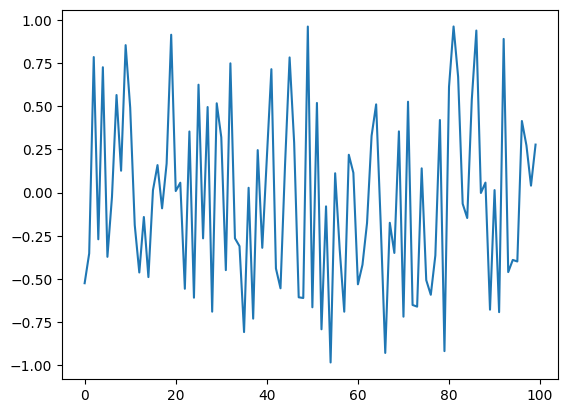

In [13]:
# random 100 float number in range [-1, 1]
numbers = np.random.random(100)*2 -1
# print(numbers)

# plot number
import matplotlib.pyplot as plt
plt.plot(numbers)

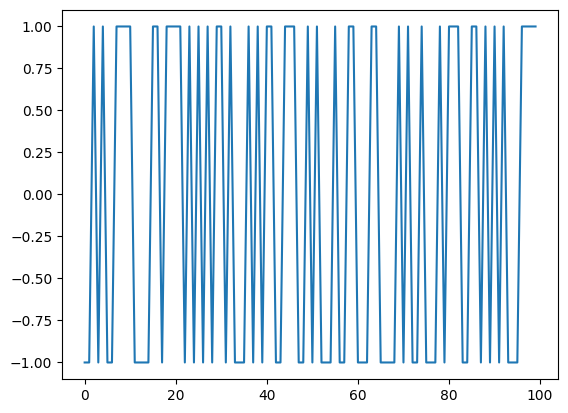

In [14]:
new_numbers = list(map(lambda x: 1 if x>=0 else -1, numbers))
plt.plot(new_numbers)

In [15]:
numbers = np.random.randint(-99, 100, 20)
# convert negative numbers to positive numbers
print(numbers)
positive = list(map(lambda x: x if x>0 else x*-1, numbers))
print(positive)

[-65  86 -95  11  28  10  82  11  68  44  34  58  59 -34  28  84  58 -27
  12 -97]
[65, 86, 95, 11, 28, 10, 82, 11, 68, 44, 34, 58, 59, 34, 28, 84, 58, 27, 12, 97]


In [16]:
# Find max in negative list, and vice versa (list had been convert)
print(positive)
print(min(positive))
print(list(map(lambda x: x if x<0 else x*-1, numbers)))
print(max(list(map(lambda x: x if x<0 else x*-1, numbers))))

# Find max in negative list, and vice versa
print(list(filter(lambda x : x < 0, numbers)))
print(max(filter(lambda x : x < 0, numbers)))
print(list(filter(lambda x : x > 0, numbers)))
print(min(filter(lambda x : x > 0, numbers)))

[65, 86, 95, 11, 28, 10, 82, 11, 68, 44, 34, 58, 59, 34, 28, 84, 58, 27, 12, 97]
10
[-65, -86, -95, -11, -28, -10, -82, -11, -68, -44, -34, -58, -59, -34, -28, -84, -58, -27, -12, -97]
-10
[-65, -95, -34, -27, -97]
-27
[86, 11, 28, 10, 82, 11, 68, 44, 34, 58, 59, 28, 84, 58, 12]
10
